In [144]:
!pip install catboost --no-cache-dir

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.datasets import make_classification
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Magnitude Types

# mwc     Centroid; ~5.5 and larger
# mb      short period body wave; ~4.0 to ~6.5
# mw      moment w-phase; ~5.0 and larger
# mwb     body wave: ~5.5 to ~7.0
# ms      20 second surface wave; ~5.0 to ~8.5
# mwr     regional; ~4.0 to ~6.5

In [65]:
import pandas as pd

In [66]:
# Loading the data
# Earthquakes in Japan from 1992 to 2005

df = pd.read_csv('/Users/shilpasingh/Downloads/query (2).csv')

In [67]:
df.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
802,1992-02-01T19:04:04.530Z,35.106,139.644,100.0,5.8,mw,NaN,NaN,NaN,0.9,...,2017-04-13T22:04:13.851Z,"near the south coast of Honshu, Japan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
803,1992-01-22T01:06:55.510Z,38.470,140.308,115.7,5.7,mw,NaN,NaN,NaN,0.9,...,2016-11-09T21:43:42.034Z,"eastern Honshu, Japan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
804,1992-01-16T18:46:49.730Z,41.514,141.850,72.6,5.4,mw,NaN,NaN,NaN,1.2,...,2016-11-09T21:41:06.938Z,"Hokkaido, Japan region",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
805,1992-01-06T20:44:12.460Z,33.459,138.643,20.8,5.1,ms,NaN,NaN,NaN,1.3,...,2014-11-07T00:49:53.535Z,"Izu Islands, Japan region",earthquake,NaN,NaN,NaN,3.0,reviewed,us,us
806,1992-01-05T11:38:46.870Z,35.497,140.237,71.9,5.2,mb,NaN,NaN,NaN,0.7,...,2014-11-07T00:49:53.161Z,"near the east coast of Honshu, Japan",earthquake,NaN,6.8,NaN,5.0,reviewed,us,us


In [68]:
df.index

RangeIndex(start=0, stop=807, step=1)

In [69]:
# Changing the index from 0 to 1

df.index = df.index+1

In [70]:
df.index

RangeIndex(start=1, stop=808, step=1)

In [71]:
df.shape

(807, 22)

In [72]:
# Selecting only the earthquakes that occured in Japan.

df1 = df[df.place.str.contains('Japan')]

In [73]:
df1.shape

(805, 22)

In [74]:
df1.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [75]:
df1.tail().T

,803,804,805,806,807
time,1992-02-01T19:04:04.530Z,1992-01-22T01:06:55.510Z,1992-01-16T18:46:49.730Z,1992-01-06T20:44:12.460Z,1992-01-05T11:38:46.870Z
latitude,35.106,38.47,41.514,33.459,35.497
longitude,139.644,140.308,141.85,138.643,140.237
depth,100,115.7,72.6,20.8,71.9
mag,5.8,5.7,5.4,5.1,5.2
magType,mw,mw,mw,ms,mb
nst,NaN,NaN,NaN,NaN,NaN
gap,NaN,NaN,NaN,NaN,NaN
dmin,NaN,NaN,NaN,NaN,NaN
rms,0.9,0.9,1.2,1.3,0.7


In [76]:
# Deleting unwanted columns

cols_of_interest = ['time','latitude','longitude','depth','mag','magType','place','id']

df1 = df1[cols_of_interest]
print(df1.shape)
df1.head()


(805, 8)


,time,latitude,longitude,depth,mag,magType,place,id
1,2005-12-20T22:58:03.740Z,37.920,143.311,28.0,5.0,mwc,"off the east coast of Honshu, Japan",usp000e6hc
2,2005-12-20T05:34:41.710Z,34.529,136.629,354.4,5.0,mwr,"western Honshu, Japan",usp000e6fv
3,2005-12-16T18:32:16.420Z,38.506,141.900,42.9,6.0,mwc,"near the east coast of Honshu, Japan",usp000e69b
4,2005-12-04T22:20:27.460Z,37.884,142.443,35.2,5.2,mwc,"off the east coast of Honshu, Japan",usp000e5hr
5,2005-12-04T18:03:17.640Z,40.143,142.639,45.7,5.0,mwc,"near the east coast of Honshu, Japan",usp000e5hd


In [77]:
df1.dtypes

time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
magType       object
place         object
id            object
dtype: object

In [78]:
df1.isnull().sum()

time         0
latitude     0
longitude    0
depth        0
mag          0
magType      0
place        0
id           0
dtype: int64

In [79]:
df1.mag.value_counts()

5.0    139
5.1    119
5.2    119
5.3     95
5.4     71
5.5     48
5.7     46
5.6     35
5.8     28
5.9     26
6.0     17
6.1     14
6.2      8
6.6      7
6.3      7
6.4      6
6.5      5
6.7      4
6.9      3
7.0      3
7.2      2
7.4      1
7.8      1
6.8      1
Name: mag, dtype: int64

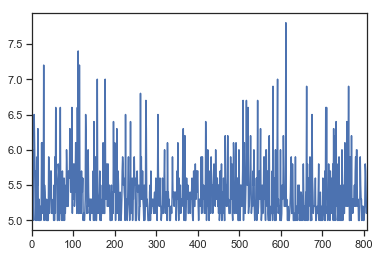

In [80]:
df1.mag.plot()

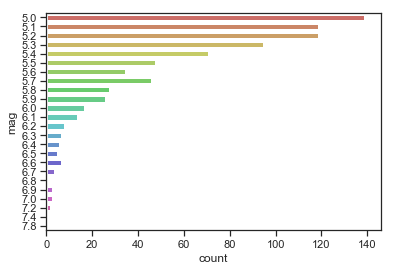

In [81]:
# Distribution of earthquakes of different magnitudes
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y='mag', data=df1, palette='hls', linewidth=3)
plt.show()

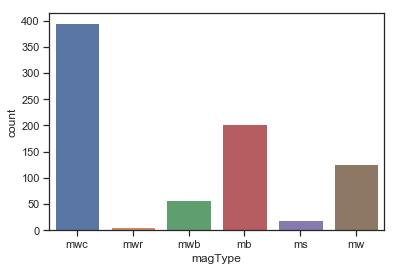

In [82]:
# Distribution of 'magnitude types' of earthquakes.

sns.countplot(x='magType', data=df1)
plt.show()

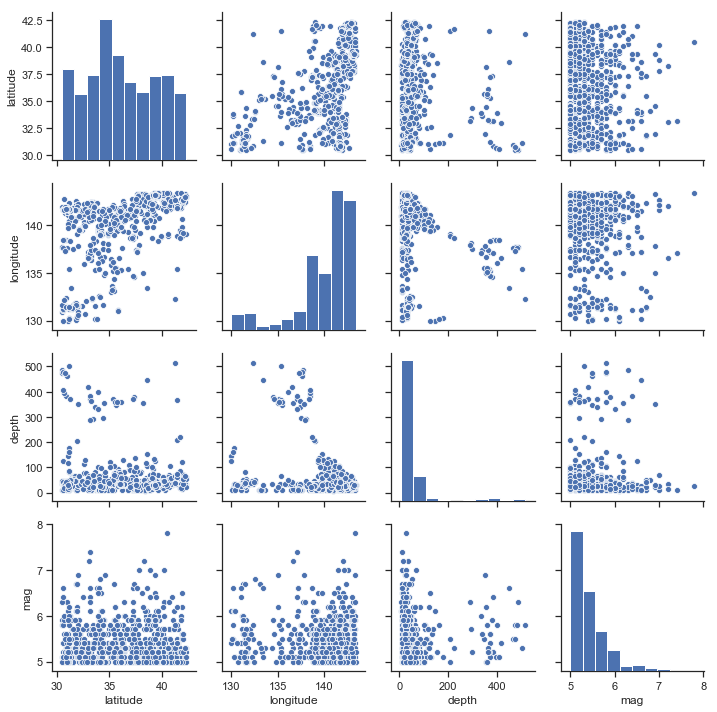

In [83]:
# Correlation matrix
sns.pairplot(df1)
plt.show()

In [85]:
df1.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'place',
       'id'],
      dtype='object')

In [86]:
df1.magType.value_counts()

mwc    395
mb     202
mw     126
mwb     57
ms      19
mwr      6
Name: magType, dtype: int64

In [87]:
df1['magType'] = df1['magType'].map({'mwc':1,
                       'mb':2,
                       'mw':3,
                       'mwb':4,
                       'ms':5,
                       'mwr':6})

In [88]:
df1.dtypes

time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
magType        int64
place         object
id            object
dtype: object

In [89]:
df1.magType.value_counts()

1    395
2    202
3    126
4     57
5     19
6      6
Name: magType, dtype: int64

In [91]:
df1.isna().sum()

time         0
latitude     0
longitude    0
depth        0
mag          0
magType      0
place        0
id           0
dtype: int64

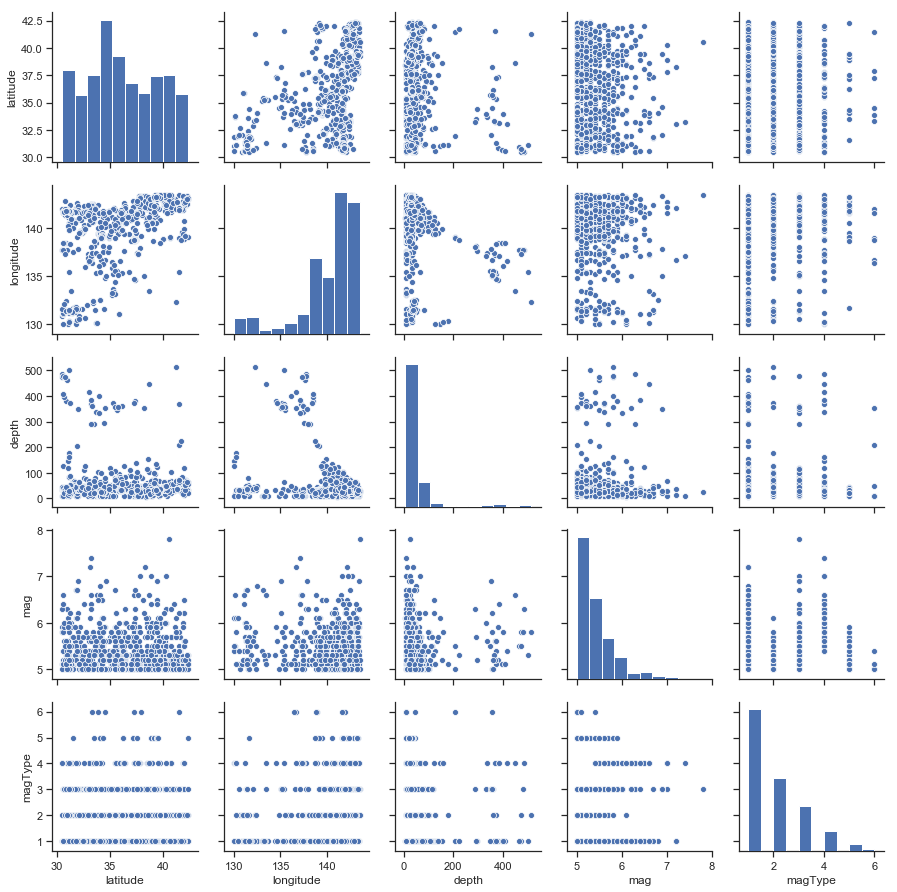

In [93]:
#pairplot with magType

sns.pairplot(df1)
plt.show()

In [94]:
# Differentiating dependent and independent variables

X = df1[['latitude', 'longitude', 'depth', 'mag']]
y = df1['magType']

In [95]:
# Splitting the data into 75% train size and 25% test size

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42 )

In [96]:
X_train.fillna(X_train.mean())

,latitude,longitude,depth,mag
632,42.293,143.015,63.0,5.0
746,39.364,143.411,31.5,5.0
727,33.190,137.975,289.4,6.3
160,37.823,137.901,33.0,5.1
70,34.089,141.561,20.1,5.1
287,34.127,139.180,10.0,5.7
133,34.158,141.420,45.6,5.1
45,31.922,139.057,206.4,5.5
71,41.456,142.065,65.5,5.4
268,37.556,141.402,49.1,5.3


In [97]:
# Multiclass Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
y_pred = lr.predict(X_test)

In [99]:
# Confusion Matrix using heatmap

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[90, 17,  0,  0,  0],
       [22, 29,  1,  0,  0],
       [19,  1,  0,  2,  0],
       [14,  0,  0,  1,  0],
       [ 5,  1,  0,  0,  0]])

Text(0.5, 257.44, 'Predicted label')

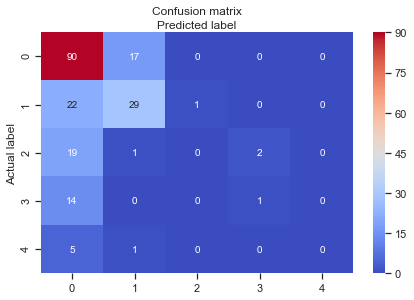

In [100]:
class_names=[1,2,3,4,5,6]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [101]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.594059405940594


In [102]:
# ROC AUC score

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.5690984112929658


In [119]:
# Random Forest Classifier
# 1st attempt

clf = RandomForestClassifier(n_estimators=10, max_depth=6, n_jobs=1, verbose=2)
clf.fit(X_train, y_train)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)

In [120]:
y_pred1 = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [121]:
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.5792079207920792


In [123]:
# 2nd attempt
X1, y1 = make_classification(n_samples=1000, n_features=6,
                           n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)

In [129]:
clf1 = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [133]:
y_pred2 = clf1.predict(X_test)

In [134]:
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred2))

Accuracy score: 0.5841584158415841


In [152]:
# 3rd attempt

model = RandomForestRegressor(n_estimators=100, max_depth=20)

scores = cross_validate(model, X_train, y_train, 
                        scoring='neg_mean_absolute_error', 
                        cv=3, return_train_score=True, 
                        return_estimator=True)

pd.DataFrame(scores)


,fit_time,score_time,estimator,test_score,train_score
0,0.270239,0.028695,"(DecisionTreeRegressor(criterion='mse', max_de...",-0.874328,-0.335174
1,0.199372,0.014320,"(DecisionTreeRegressor(criterion='mse', max_de...",-0.898904,-0.321355
2,0.176557,0.010720,"(DecisionTreeRegressor(criterion='mse', max_de...",-0.911985,-0.316477


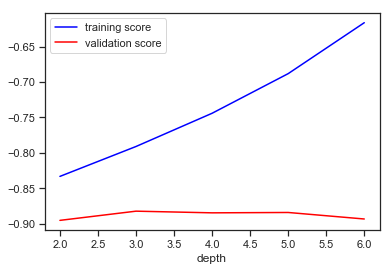

In [153]:
# Validation Curve (with Random Forest)

from sklearn.model_selection import validation_curve

model = RandomForestRegressor(n_estimators=100)

depth = [2, 3, 4, 5, 6]
train_score, val_score = validation_curve(
    model, X_train, y_train,
    param_name='max_depth', param_range=depth, 
    scoring='neg_mean_absolute_error', cv=3)

plt.plot(depth, np.median(train_score, 1), color='blue', label='training score')
plt.plot(depth, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('depth');

In [156]:
# Grid Search (with Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200], 
    'max_depth': [4, 5], 
    'criterion': ['mse', 'mae']
}

gridsearch = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=3, 
                          scoring='neg_mean_absolute_error', verbose=10, 
                          return_train_score=True)

gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] criterion=mse, max_depth=4, n_estimators=100 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_depth=4, n_estimators=100, score=-0.8399023765684376, total=   1.0s
[CV] criterion=mse, max_depth=4, n_estimators=100 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  criterion=mse, max_depth=4, n_estimators=100, score=-0.9080142512072656, total=   0.3s
[CV] criterion=mse, max_depth=4, n_estimators=100 ....................
[CV]  criterion=mse, max_depth=4, n_estimators=100, score=-0.8837365876910029, total=   0.1s
[CV] criterion=mse, max_depth=4, n_estimators=200 ....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s


[CV]  criterion=mse, max_depth=4, n_estimators=200, score=-0.8296918480048946, total=   0.3s
[CV] criterion=mse, max_depth=4, n_estimators=200 ....................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


[CV]  criterion=mse, max_depth=4, n_estimators=200, score=-0.9133819598500641, total=   0.3s
[CV] criterion=mse, max_depth=4, n_estimators=200 ....................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s remaining:    0.0s


[CV]  criterion=mse, max_depth=4, n_estimators=200, score=-0.8853559898291333, total=   0.3s
[CV] criterion=mse, max_depth=5, n_estimators=100 ....................
[CV]  criterion=mse, max_depth=5, n_estimators=100, score=-0.8408824082336783, total=   0.1s
[CV] criterion=mse, max_depth=5, n_estimators=100 ....................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.5s remaining:    0.0s


[CV]  criterion=mse, max_depth=5, n_estimators=100, score=-0.8966884802695216, total=   0.2s
[CV] criterion=mse, max_depth=5, n_estimators=100 ....................
[CV]  criterion=mse, max_depth=5, n_estimators=100, score=-0.8897326148918591, total=   0.1s
[CV] criterion=mse, max_depth=5, n_estimators=200 ....................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.8s remaining:    0.0s


[CV]  criterion=mse, max_depth=5, n_estimators=200, score=-0.8333218825175462, total=   0.3s
[CV] criterion=mse, max_depth=5, n_estimators=200 ....................
[CV]  criterion=mse, max_depth=5, n_estimators=200, score=-0.9066143367696062, total=   0.3s
[CV] criterion=mse, max_depth=5, n_estimators=200 ....................
[CV]  criterion=mse, max_depth=5, n_estimators=200, score=-0.8802610690015654, total=   0.3s
[CV] criterion=mae, max_depth=4, n_estimators=100 ....................
[CV]  criterion=mae, max_depth=4, n_estimators=100, score=-0.7596019900497513, total=   0.5s
[CV] criterion=mae, max_depth=4, n_estimators=100 ....................
[CV]  criterion=mae, max_depth=4, n_estimators=100, score=-0.9178855721393036, total=   0.5s
[CV] criterion=mae, max_depth=4, n_estimators=100 ....................
[CV]  criterion=mae, max_depth=4, n_estimators=100, score=-0.8763930348258705, total=   0.5s
[CV] criterion=mae, max_depth=4, n_estimators=200 ....................
[CV]  criterion=

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   14.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200], 'max_depth': [4, 5], 'criterion': ['mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=10)

In [157]:
results = pd.DataFrame(gridsearch.cv_results_)
print(f'Best result from grid search of {len(results)} parameter combinations')
results.sort_values(by='rank_test_score').head(1)

Best result from grid search of 8 parameter combinations


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
7,1.305092,0.295223,0.016581,0.001784,mae,5,200,"{'criterion': 'mae', 'max_depth': 5, 'n_estima...",-0.755224,-0.910784,-0.873383,-0.846464,0.066298,1,-0.670187,-0.661735,-0.693539,-0.675153,0.01345


In [158]:
gridsearch.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)